C:\Users\dominiquef\Documents\GIT\subsurface\subsurface\reader\__init__.py:12: UserWarning: Welly or Striplog not installed. No well reader possible.
  warnings.warn("Welly or Striplog not installed. No well reader possible.")


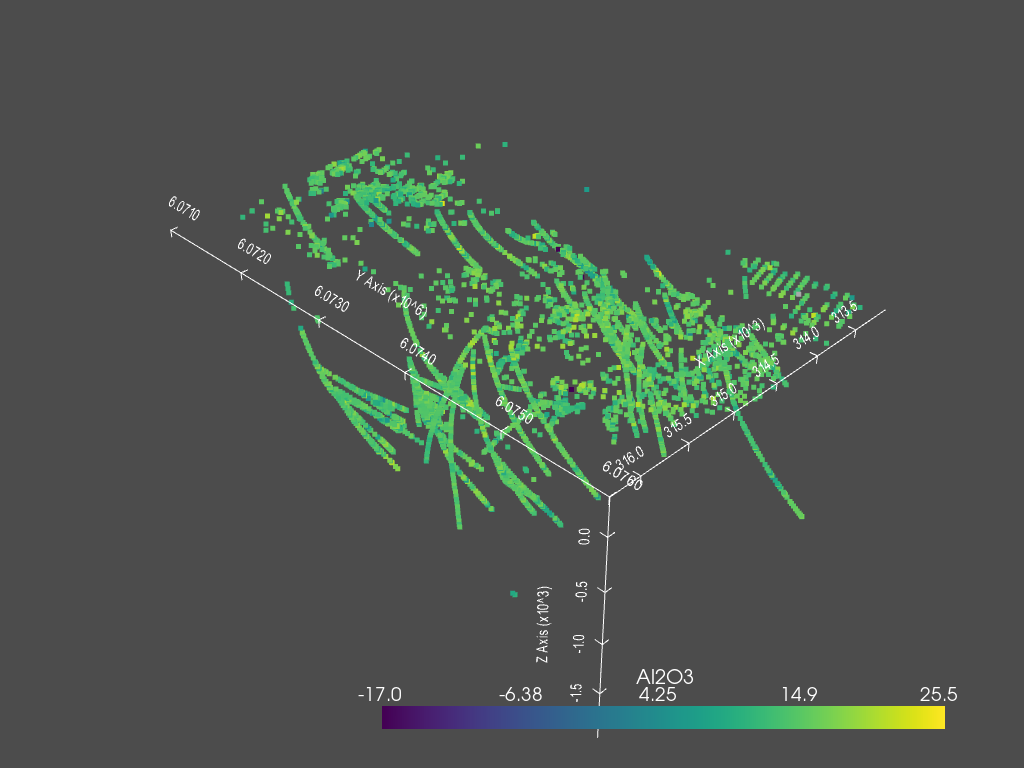

In [1]:
import numpy as np
import pandas as pd
import subsurface as subs
from subsurface import visualization
from subsurface.structs.base_structures import UnstructuredData 
from subsurface.structs.unstructured_elements import PointSet
from geoh5py.workspace import Workspace
from geoh5py.objects import Curve, Points, Surface
from geoh5py.shared import Entity
from typing import List, Union

# Get Points object from geoh5
ws = Workspace("../../assets/FlinFlon.geoh5")
points = ws.get_entity("geochem")[0]

# Grab data to go along
names = ["Al2O3", "CaO"]

data_dict = {}
for name in names:
    data_dict[name] = points.get_data(name)[0].values


d_f = pd.DataFrame(data_dict, columns=list(data_dict.keys()))

pt_set = PointSet(UnstructuredData.from_array(points.vertices, "points", cells_attr=d_f))

pv_pt = visualization.to_pyvista_points(pt_set)
visualization.pv_plot(
    [pv_pt],
    image_2d=False,
)


In [2]:

def to_subsurface(entity: Entity, data: Union[None, List[str]]=None):
    """
    Convert a geoh5py object and data to a subsurface class
    """

    subs_obj = None
    TYPES = (Points, Curve, Surface)
    assert isinstance(
        entity, TYPES
    ), f"Conversion to subsurface only available for objects type {TYPES}"

    return subs_obj